In [ ]:
PROJECT 1
#Logistic Regression model to categorize wine|| wine_fraud(from kaggle)

#1.creating dataframe
import pandas as pd
df = pd.read_csv('/content/wine_fraud.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [ ]:
#there are no empty(null) spaces in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [ ]:
#2.Preprocessing (finding no of unique for quality cloumn )
df.quality.unique()

array(['Legit', 'Fraud'], dtype=object)

In [ ]:
#selecting rows which has 'Legit' in column 'Quality' and replacing this new dataframe with original dataframe (df)
df=df.loc[(df['quality'])=='Legit']
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [ ]:
#removing the column 'Quality' from dataframe
df=df.drop(['quality'],axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,white


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6251 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6251 non-null   float64
 1   volatile acidity      6251 non-null   float64
 2   citric acid           6251 non-null   float64
 3   residual sugar        6251 non-null   float64
 4   chlorides             6251 non-null   float64
 5   free sulfur dioxide   6251 non-null   float64
 6   total sulfur dioxide  6251 non-null   float64
 7   density               6251 non-null   float64
 8   pH                    6251 non-null   float64
 9   sulphates             6251 non-null   float64
 10  alcohol               6251 non-null   float64
 11  type                  6251 non-null   object 
dtypes: float64(11), object(1)
memory usage: 634.9+ KB


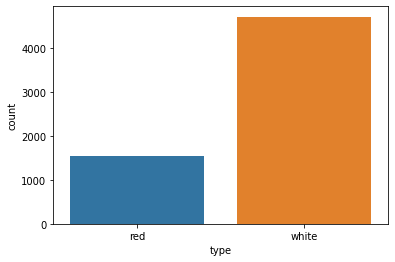

In [ ]:
#3.Data Visualization on type of wines in the data
import seaborn as sns
sns.countplot(x = 'type',data = df)

In [ ]:
#4. Dividing the data into input and output
#creating input by taking the columns which categorize wine(all columns except 'type')
x = df.iloc[:,0:11].values 
x

array([[ 7.4 ,  0.7 ,  0.  , ...,  3.51,  0.56,  9.4 ],
       [ 7.8 ,  0.88,  0.  , ...,  3.2 ,  0.68,  9.8 ],
       [ 7.8 ,  0.76,  0.04, ...,  3.26,  0.65,  9.8 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [ ]:
# Creating Output ('type')
y = df.iloc[:,11].values
y

array(['red', 'red', 'red', ..., 'white', 'white', 'white'], dtype=object)

In [ ]:
#5.splitting the data (x,y) into train and test variables(train variables are used to train the model)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
#7.Applying logistic regression(creating model)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
#8.Fitting the training variables in the model and predicting  the output for test variables
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array(['white', 'white', 'white', ..., 'white', 'white', 'red'],
      dtype=object)

In [ ]:
#outputs from real data
y_test

array(['white', 'white', 'white', ..., 'white', 'white', 'red'],
      dtype=object)

In [ ]:
#Finding accuray of the model by comparing predicted and real outputs( in % by multiplying accuracy_score with 100)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

98.2725527831094